In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("./input/diamonds_train.csv",index_col="Unnamed: 0")

#### Checking null values

In [3]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### Checking data types 

In [4]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

#### Mapping categorical data

In [5]:
cut={"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4}
color={"J":0,"I":1,"H":2,"G":3,"F":4,"E":5,"D":6}
clarity={"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4, "VVS2":5, "VVS1":6, "IF":7}

data.cut=data.cut.map(cut)
data.color=data.color.map(color)
data.clarity=data.clarity.map(clarity)

#### Data statistics

In [6]:
data.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,2.903532,3.413236,3.058025,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.115488,1.695243,1.648637,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,4.000000,6.000000,7.000000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


#####   X,Y,Z=0???

There are a few entries where dimensions of the diamond were not recorded. Since those are a relatively low quantity compared to the total records, we are going to drop them

In [7]:
data.drop(index=data.x[data.x==0].index,errors="ignore",inplace=True)
data.drop(index=data.y[data.y==0].index,errors="ignore",inplace=True)
data.drop(index=data.z[data.z==0].index,errors="ignore",inplace=True)

In [8]:
data.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,40328.000000,40328.000000,40328.000000,40328.000000,40328.000000,40328.000000,40328.000000,40328.000000,40328.000000,40328.000000
mean,0.795361,2.903665,3.413435,3.058570,61.750575,57.459827,5.726667,5.730629,3.536626,3921.960549
std,0.470536,1.115458,1.695419,1.648462,1.423888,2.234841,1.115944,1.146289,0.689999,3979.598113
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,947.000000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,5.690000,5.710000,3.520000,2394.000000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,6.540000,6.530000,4.030000,5312.000000
max,4.010000,4.000000,6.000000,7.000000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


#### Detecting outliers 

We are not going to find outliers in carat, cut, color or clarity columns since those are categorical data mapped to numerical by us.

Depth and table are related to x,y and z, so we are going to look first at this.

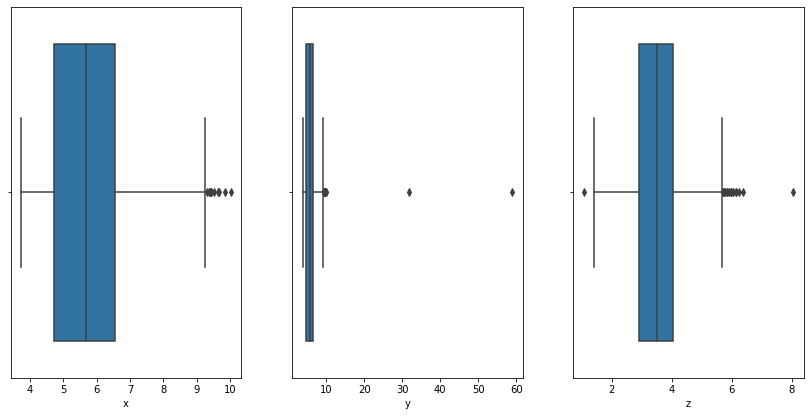

In [9]:
dimensions=["x","y","z"]


fig,axis=plt.subplots(1,3,figsize=(12,6))

fig.tight_layout(pad=2.0)
for i in range(0,3):
        sns.boxplot(data[dimensions[i]],ax=axis[i])

While we dont intend to drop outliers for training our models (They can be quite relevant) the points at y =30 and y=60 are clearly out of scale

In [10]:
data.drop(index=data[data.y==data.y.max()].index,inplace=True)
data.drop(index=data[data.y==data.y.max()].index,inplace=True)

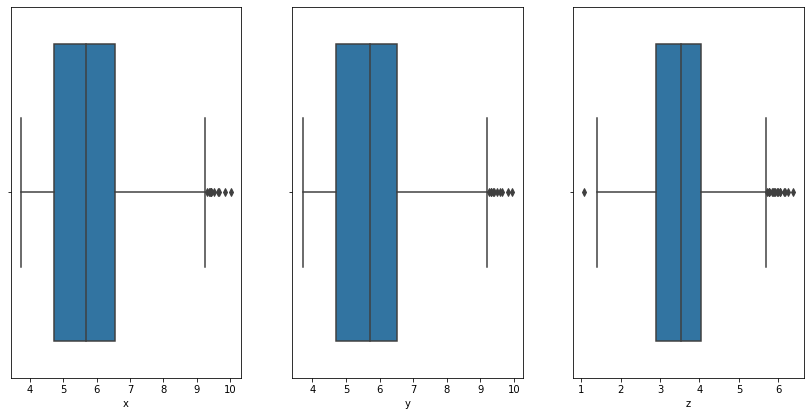

In [11]:
fig,axis=plt.subplots(1,3,figsize=(12,6))

fig.tight_layout(pad=2.0)
for i in range(0,3):
        sns.boxplot(data[dimensions[i]],ax=axis[i])

Here we conclude the non-specefic cleaning of the data.

In [12]:
data.to_csv('output/data_cleaned.csv')

In [69]:
cut={"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4}
color={"J":0,"I":1,"H":2,"G":3,"F":4,"E":5,"D":6}
clarity={"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4, "VVS2":5, "VVS1":6, "IF":7}

data.cut=data.cut.map(cut)
data.color=data.color.map(color)
data.clarity=data.clarity.map(clarity)


,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4,2,1,60.0,56.0,4.41,4.43,2.65
1,0.34,4,6,7,62.1,57.0,4.52,4.46,2.79
2,1.57,2,1,3,60.3,58.0,7.58,7.55,4.56
3,0.31,4,2,3,61.8,57.0,4.32,4.36,2.68
4,1.51,1,1,6,64.0,60.0,7.26,7.21,4.63
...,...,...,...,...,...,...,...,...,...
13444,1.05,4,4,1,60.3,55.0,6.55,6.68,3.99
13445,0.27,2,3,4,61.9,56.0,4.13,4.16,2.56
13446,1.50,3,6,3,61.8,60.0,7.30,7.37,4.53
13447,1.70,3,4,1,60.2,61.0,7.79,7.68,4.66


In [82]:
x.to_csv("./output/sample_submission.csv",index_label="id")